# Load Data Set

In [1]:
import pandas as pd

In [2]:
# define column names
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [3]:
# loading training data
df = pd.read_csv('dataset/iris.data', header=None, names=names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Visualize Data Set

In [4]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# can choose different styles
# print(plt.style.available)
plt.style.use('fivethirtyeight')
# list available fonts: [f.name for f in matplotlib.font_manager.fontManager.ttflist]
matplotlib.rc('font', family='DejaVu Sans') 

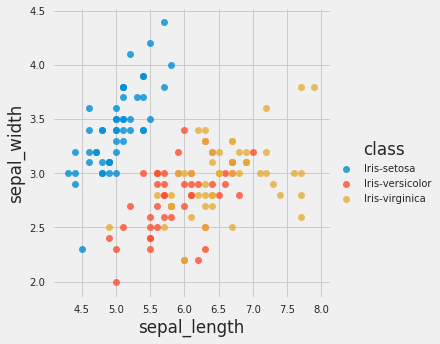

In [5]:
sns.lmplot('sepal_length', 'sepal_width', data=df, hue='class', fit_reg=False)
plt.show()

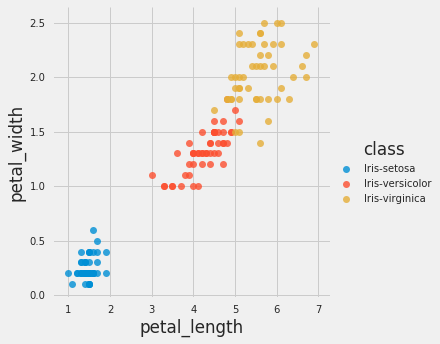

In [6]:
sns.lmplot('petal_length', 'petal_width', data=df, hue='class', fit_reg=False)
plt.show()

# Train

## Split test and train data

In [23]:
import numpy as np
# deprecated
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [24]:
# create design matrix X and target vector Y
X = np.array(df.ix[:, 0:4]) # end index is exclusive
y = np.array(df['class']) # another way of indexing a pandas df

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Define classifer

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [11]:
# instantiate lerning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

In [12]:
# fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [13]:
# predict the response
pred = knn.predict(X_test)

In [14]:
print(accuracy_score(y_test, pred))

0.98


# k-fold cross validation
[!] Using the test set for hyperparameter tuning can lead to overfitting.

In [15]:
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,50))

In [16]:
# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [17]:
# empty list that will hold cv scores
cv_scores = []

In [18]:
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

## plot the misclassification error versus K

In [19]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

In [20]:
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]

In [21]:
print ('the optimal number of neighbors is {}'.format(optimal_k))

the optimal number of neighbors is 7


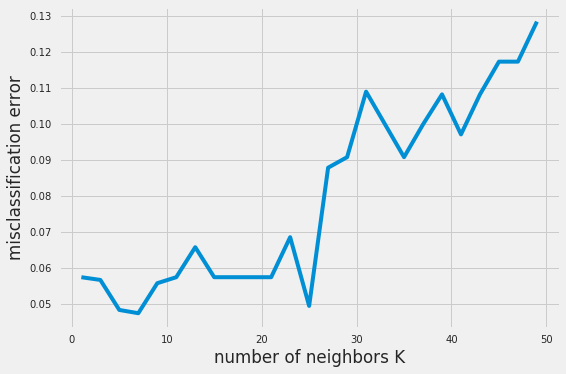

In [22]:
# plot miscllassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('number of neighbors K')
plt.ylabel('misclassification error')
plt.show()